Epoch 1/20
469/469 [==============================] - 21s 30ms/step - loss: 0.2481 - val_loss: 0.2032
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.1857 - val_loss: 0.1709
Epoch 3/20
469/469 [==============================] - 14s 29ms/step - loss: 0.1638 - val_loss: 0.1560
Epoch 4/20
469/469 [==============================] - 18s 38ms/step - loss: 0.1522 - val_loss: 0.1451
Epoch 5/20
469/469 [==============================] - 17s 37ms/step - loss: 0.1443 - val_loss: 0.1380
Epoch 6/20
469/469 [==============================] - 19s 40ms/step - loss: 0.1382 - val_loss: 0.1326
Epoch 7/20
469/469 [==============================] - 16s 34ms/step - loss: 0.1329 - val_loss: 0.1277
Epoch 8/20
469/469 [==============================] - 18s 38ms/step - loss: 0.1288 - val_loss: 0.1254
Epoch 9/20
469/469 [==============================] - 18s 38ms/step - loss: 0.1255 - val_loss: 0.1225
Epoch 10/20
469/469 [==============================] - 18s 39ms/step - loss: 0.122

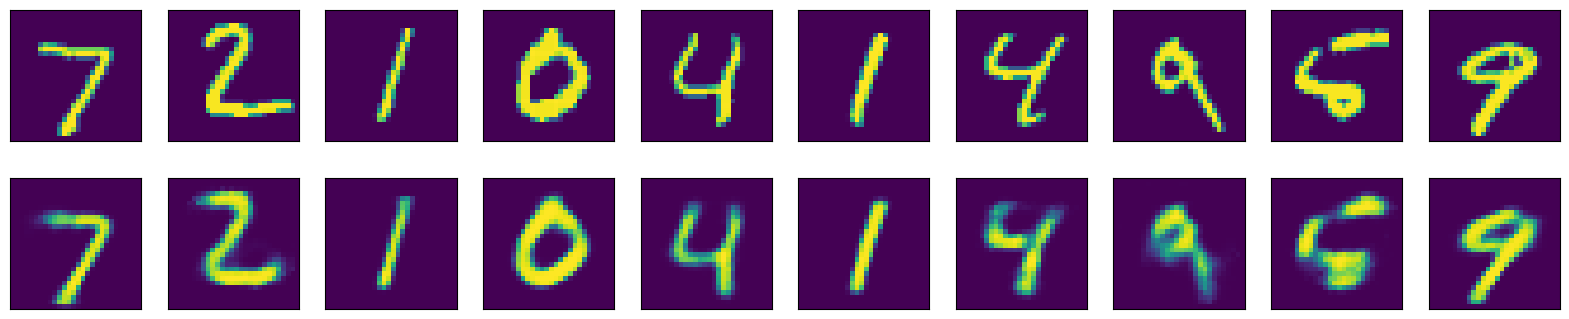

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the encoder architecture
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
])

# Define the decoder architecture
decoder = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[32]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28]),
])

# Combine the encoder and decoder into an autoencoder model
autoencoder = keras.models.Sequential([encoder, decoder])

# Compile the autoencoder model
autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.001))

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

# Use the trained autoencoder to predict the reconstructed images for the test data
decoded_imgs = autoencoder.predict(x_test)

# Plot some of the original test images and their reconstructed counterparts
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
Implement deep learning for the Prediction of the autoencoder from the test data (e.g., MNIST (data
set)

In [ ]:
 An autoencoder is a special type of neural network that is trained to copy its input to its output.
For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower
dimensional latent representation, then decodes the latent representation back to an image. An autoencoder
learns to compress the data while minimizing the reconstruction error.
The encoder part of the network is used for encoding and sometimes even for data compression purposes
although it is not very effective as compared to other general compression techniques like JPEG. Encoding
is achieved by the encoder part of the network which has a decreasing number of hidden units in each
layer. Thus, this part is forced to pick up only the most significant and representative features of the data.
The second half of the network performs the Decoding function. This part has an increasing number of
hidden units in each layer and thus tries to reconstruct the original input from the encoded data. Thus
Auto-encoders are an unsupervised learning technique.